#  Electricity Price Prediction Using Linear Regression
By Mauricio Hernandez

## Goal(s):
- Learn to calculate the linear regression coefficients manually
- Use sklearn tools to make some predictions on the future prices of electricity

What is Linear Regression
---
Linear Regression is a machine learning is a supervised learning algorithm that performs regression task. Machile learning models based on linear regression predict a `target` value (dependent variable)  based on `features` (independent variables).

See more info at: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a


In [1]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

*Read CSV file with information about consumption*

In [2]:
dateparse = lambda x: datetime.strptime(x, '%m/%d/%Y')

df_bill = pd.read_csv('./inputs/site01_bill.csv', parse_dates=['initial_date', 'end_date'], date_parser=dateparse, index_col = False)
df_bill

,service_number,state,municipality,longitude,latitude,household_size,tarif,initial_date,end_date,total_bill,...,consumption_kwh,tax_iva,cost_supply,cost_distribution,cost_transmission,cost_cenace,cost_energy,cost_capacity,cost_market,cost_dap
0,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-12-22,2021-02-21,645.0,...,108.88,13.93,56.66,114.60,16.93,0.82,87.05,43.37,0.57,0
1,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-02-21,2021-04-18,582.0,...,98.25,12.57,51.13,103.40,15.28,0.74,78.55,39.13,0.51,0
2,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-04-18,2021-06-18,532.0,...,89.81,11.49,46.73,94.52,13.97,0.68,71.80,35.77,0.47,0
3,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-06-18,2021-08-19,602.0,...,101.62,13.00,52.88,106.96,15.80,0.76,81.25,40.48,0.53,0
4,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-08-19,2021-10-18,545.0,...,92.00,11.77,49.88,96.83,14.31,0.69,73.56,36.64,0.48,0
5,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-10-18,2021-12-23,622.0,...,105.00,13.43,55.64,111.51,16.33,0.79,83.95,41.82,0.55,0


In [3]:
#Adding number of days included in each bill, just sanity check

#df_bill['days'] = df_bill.apply(lambda x: (x['end_date'] - x['initial_date']).days, axis=1)
#df_bill.days

0   -304
1     56
2     61
3     62
4     60
5     66
Name: days, dtype: int64

In [4]:
#check dataframe info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   service_number     6 non-null      int64         
 1   state              6 non-null      object        
 2   municipality       6 non-null      object        
 3   longitude          6 non-null      float64       
 4   latitude           6 non-null      float64       
 5   household_size     6 non-null      int64         
 6   tarif              6 non-null      int64         
 7   initial_date       6 non-null      datetime64[ns]
 8   end_date           6 non-null      datetime64[ns]
 9   total_bill         6 non-null      float64       
 10  subsidy_bill       6 non-null      float64       
 11  consumption_kwh    6 non-null      float64       
 12  tax_iva            6 non-null      float64       
 13  cost_supply        6 non-null      float64       
 14  cost_distribut

*Sorting rows of dataframe in ascending order based on initial date and add bimester* 

In [23]:
df_bill.sort_values("initial_date", axis = 0, ascending = True, inplace = True)
#reset index
df_bill = df_bill.reset_index(col_level = 0, drop=True)
df_bill['bimester'] = df_bill.index + 1
df_bill.head()

,service_number,state,municipality,longitude,latitude,household_size,tarif,initial_date,end_date,total_bill,...,cost_capacity,cost_market,cost_dap,days,bimester,real_cost,price_per_KWh,x-xavg,y-yavg,sqrt_x-xavg
0,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-02-21,2021-04-18,582.0,...,39.13,0.51,0,56,1,288.74,2.938830,-2.5,-0.006915,6.25
1,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-04-18,2021-06-18,532.0,...,35.77,0.47,0,61,2,263.94,2.938871,-1.5,-0.006873,2.25
2,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-06-18,2021-08-19,602.0,...,40.48,0.53,0,62,3,298.66,2.938988,-0.5,-0.006756,0.25
3,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-08-19,2021-10-18,545.0,...,36.64,0.48,0,60,4,272.39,2.960761,0.5,0.015017,0.25
4,77211104603,Querétaro,El Marqués,-100.318332,20.682081,5,1,2021-10-18,2021-12-23,622.0,...,41.82,0.55,0,66,5,310.59,2.958000,1.5,0.012256,2.25


### Descriptive statistics


## Electricity Costs Components

**Components**
1. **Energy**. Cost for the energy consumed. Measured in kWh for all rates and is paid to CFE Generación. In non-residential rates, this cost is broken down into 3 items according to the time of energy consumed.
2. **Supply**. Fixed charge independent of energy consumption or user demand. Just for having the connection and the service from  CFE
3. **Transmission**. Cost related to the transmission of electrical energy
4. **Distribution**. Cost related to the distribution the electrical energy, charged by the subsidiary company CFE Distribucion
5. **Capacity**. Cost paid  the power that the subsidiary company CFE Distribución must be able to provide to the user at any time.
6. **Market**. Charge for costs related to related services not included in the Wholesale Electricity Market (SCnMEM:).
7. **CENACE**. Cost charged by the National Center for Energy Control. Responsible for monitoring the Wholesale Electricity Market  (https://www.cenace.gob.mx/CENACE.aspx)

With the exception of supply, all the costs are charged in terms of `$/Kwh`, capacity should be charged in terms of `$/KW`


In [ ]:
## Add image

**Estimating real cost of electricity**

In [6]:
df_bill['real_cost'] = 

#average monthly cost of electricity vs real cost of electricity
print('Average Bi-monthly cost of electricity %.2f [$/month] - With Subsidies' % df_bill['total_bill'].mean())
print('Average Bi-monthly cost of electricity %.2f [$/month] - Real Cost' % df_bill['real_cost'].mean())

Average Bi-monthly cost of electricity 588.00 [$/month] - With Subsidies
Average Bi-monthly cost of electricity 292.39 [$/month] - Real Cost


**Sum of values**

In [8]:
totals = df_bill.sum(numeric_only=True)
totals 

service_number       4.632666e+11
longitude           -6.019100e+02
latitude             1.240925e+02
household_size       3.000000e+01
tarif                6.000000e+00
total_bill           3.528000e+03
subsidy_bill         1.164750e+03
consumption_kwh      5.955600e+02
tax_iva              7.619000e+01
cost_supply          3.129200e+02
cost_distribution    6.278200e+02
cost_transmission    9.262000e+01
cost_cenace          4.480000e+00
cost_energy          4.761600e+02
cost_capacity        2.372100e+02
cost_market          3.110000e+00
cost_dap             0.000000e+00
days                 1.000000e+00
bimester             2.100000e+01
real_cost            1.754320e+03
dtype: float64

**Percent of each cost component over real cost**

In [24]:
totals_perc = 
totals_perc

SyntaxError: invalid syntax (Temp/ipykernel_10616/3625629287.py, line 1)

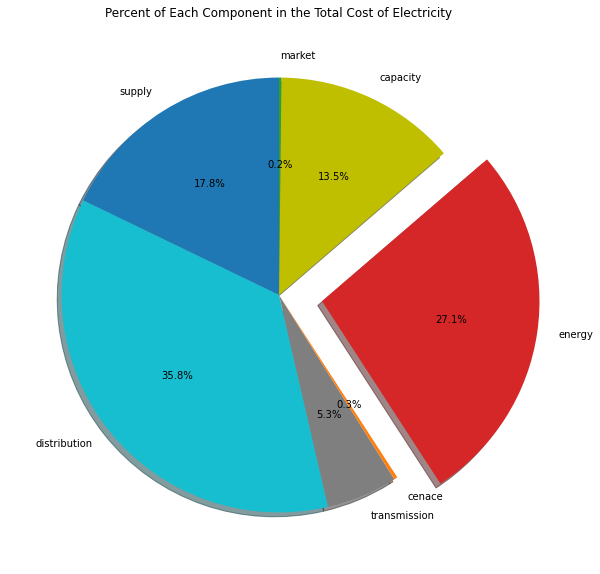

In [10]:
x = totals_perc
labels = ['supply', 'distribution', 'transmission', 'cenace', 'energy', 'capacity', 'market']
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red', 'y', 'tab:green']
explode = [0, 0, 0, 0, 0.2, 0, 0]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(x, labels = labels,
          colors = colors,
          autopct='%.1f%%',
          explode = explode,
          shadow = True,
          startangle = 90)

ax.set_title('Percent of Each Component in the Total Cost of Electricity')
#save figure
#fig.savefig('components_elect_costs.png', dpi=100)

plt.show()

## Price of Electricity Trends

**Compute price per KWh**

In [25]:
df_bill['price_per_KWh'] =      
df_bill[['bimester','price_per_KWh']]

SyntaxError: invalid syntax (Temp/ipykernel_10616/4183703697.py, line 1)

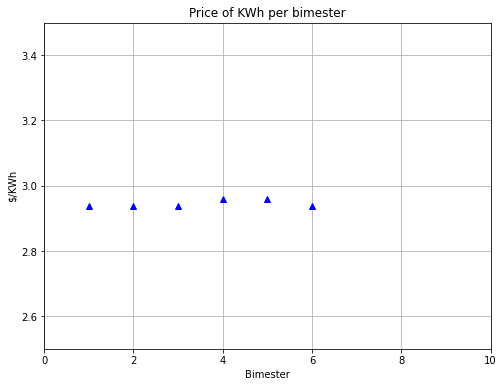

In [12]:

plt.rcParams['figure.figsize'] = (8, 6)

plt.plot( ,'b^')

plt.grid(True)
plt.title("Price of KWh per bimester")
plt.xlim(0, 10)
plt.ylim(2.5, 3.5)
plt.xlabel("Bimester")
plt.ylabel("$/KWh")
plt.savefig("cost_electricity_bimester.png", transparent=True)
plt.show()

## Least Squares

[![Least Squares](https://www.mathsisfun.com/data/images/least-squares2.svg)](https://www.youtube.com/watch?v=gUdU6BgnJ2c)


### Linear Regression Coefficients - Manual Calculation

$\hat{y} = \theta_0 + \theta_1x $

Estimate LR coefficients:

$$\theta_1 = \frac{\sum({x-\overline{x}})(y-\overline{y} )}{\sum{(x-\overline{x})^2}} \\
\theta_0 = \hat{y}-\theta_1x$$

In [13]:
df_bill['x-xavg']=(df_bill.bimester -  (df_bill.bimester).mean())
df_bill['y-yavg']=(df_bill.price_per_KWh -  (df_bill.price_per_KWh).mean())
df_bill['sqrt_x-xavg']=(df_bill['x-xavg'] *df_bill['x-xavg'] )

In [26]:
theta_1 = 
theta_1

SyntaxError: invalid syntax (Temp/ipykernel_10616/3058211670.py, line 1)

In [27]:
theta_0 =
theta_0

SyntaxError: invalid syntax (Temp/ipykernel_10616/687505641.py, line 1)

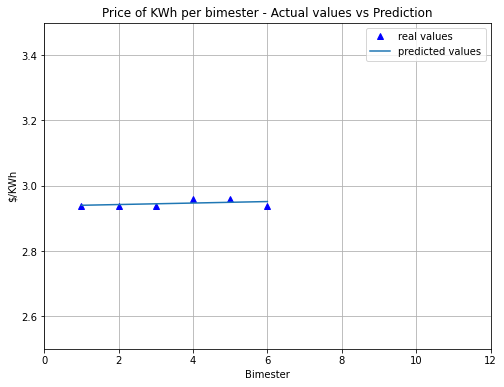

In [16]:

plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(df_bill.bimester, df_bill.price_per_KWh, 'b^', label = 'real values')

#plt.plot(df_bill.bimester, theta_0 + theta_1*df_bill.bimester, label = 'predicted values')

plt.grid(True)
plt.title("Price of KWh per bimester - Actual values vs Prediction")
plt.xlim(0, 12)
plt.ylim(2.5, 3.5)
plt.xlabel("Bimester")
plt.ylabel("$/KWh")
plt.legend(loc="best")
plt.savefig("lr_kwh_price_manual.png", transparent=True)
plt.show()

## Linear Regression Using Sklearn

In [17]:
from sklearn.linear_model import LinearRegression

X = df_bill.bimester.to_numpy()
y = df_bill.price_per_KWh.to_numpy()

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

#linear_regressor = LinearRegression()  # create object for the class
#model = linear_regressor.fit(X, y)  # perform linear regression

#y_pred = model.predict(X)  # make predictions
#y_pred = y_pred.reshape(-1, 1)

In [31]:
print("theta_0: ", model.intercept_, " theta_1: ", model.coef_)

theta_0:  [2.93773527]  theta_1:  [[0.00228826]]


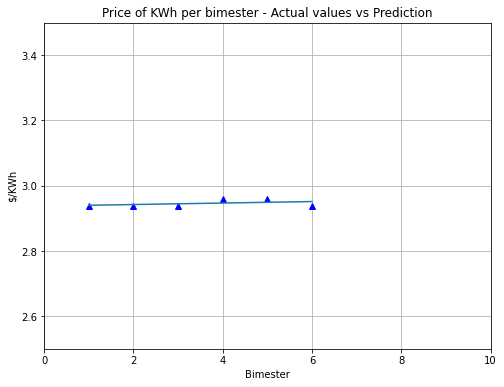

In [20]:

plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(X, y, 'b^', label='actual values')
plt.plot(X, y_pred, label= 'predicted values')

plt.grid(True)
plt.title("Price of KWh per bimester - Actual values vs Prediction")
plt.xlim(0, 10)
plt.ylim(2.5, 3.5)
plt.xlabel("Bimester")
plt.ylabel("$/KWh")
plt.savefig("lr_kwh_price_sklearn.png", transparent=True)
plt.show()

**Create array of x values (bimester) to make predictions**

In [54]:
#create array with 10 values
X_test = np.arange(1,11).reshape(-1, 1)
y_pred = model.predict(X_test)  # make predictions
y_pred = y_pred.reshape(-1, 1)

print(pd.DataFrame([X_test.reshape(-1), y_pred.reshape(-1)], index =['bimester', 'y_pred']).round(3).T)

   bimester  y_pred
0       1.0   2.940
1       2.0   2.942
2       3.0   2.945
3       4.0   2.947
4       5.0   2.949
5       6.0   2.951
6       7.0   2.954
7       8.0   2.956
8       9.0   2.958
9      10.0   2.961


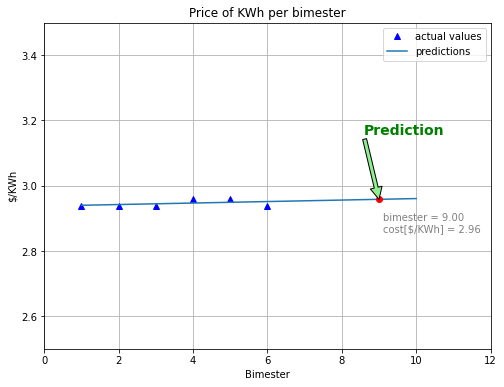

In [58]:
#Generate Plot
bimester_pred = 9

plt.rcParams['figure.figsize'] = (8, 6)
plt.plot(X, y, 'b^', label='actual values')
plt.plot(X_test, y_pred, label = 'predictions')

plt.grid(True)
plt.title("Price of KWh per bimester")
plt.xlim(0, 12)
plt.ylim(2.5, 3.5)
plt.xlabel("Bimester")
plt.ylabel("$/KWh")
plt.legend(loc="best")

#Price of electricity in bimester 9
px = X_test[[bimester_pred -1 ]]
py = y_pred[[bimester_pred - 1]]
plt.plot(px, py, 'ro')
plt.annotate("Prediction", xy=(px, py), xytext=(px-0.4,py+0.2),
                           color="green", weight="heavy", fontsize=14,
                           arrowprops={"facecolor": "lightgreen"})
plt.text(px+0.1, py-0.1, "bimester = %0.2f\ncost[$/KWh] = %0.2f"%(px, py), rotation=0, color='gray')

plt.savefig("lr_kwh_price_sklearn_test.png", transparent=True)
plt.show()

---
## Activity:
1. Use the input file assigned and complete the missing sections.

2. Predict the cost of electricity `[$/KWh]` in bimester 15, and plot your results. Briefly explain why your prediction is accurate or not. What would you do to verify the accuracy of your prediction?

3. Save your notebook as a pdf file. Submit the notebook and the pdf file in Canvas.